참조 :  https://velog.io/@top6421/EDA%EA%B3%BC%EC%A0%9C1-%EC%9D%B4%EB%94%94%EC%95%BC%EB%8A%94-%EC%A0%84%EB%9E%B5%EC%A0%81%EC%9C%BC%EB%A1%9C-%EC%8A%A4%ED%83%80%EB%B2%85%EC%8A%A4-%EA%B7%BC%EC%B2%98%EC%97%90-%EB%A7%A4%EC%9E%A5%EC%9D%84-%EB%82%BC%EA%B9%8C

참조 : https://goodthings4me.tistory.com/696

셀레니움4 find_element() find_elements() 매뉴얼
https://www.selenium.dev/documentation/webdriver/elements/finders/

In [1]:
import time
import requests
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import re
import pandas as pd

from selenium import webdriver
from matplotlib import rc
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
star_url ="https://www.starbucks.co.kr/store/store_map.do"
options = webdriver.ChromeOptions()
options.add_experimental_option('excludeSwitches', ['enable-logging'])
driver = webdriver.Chrome('C:\localRepository\StudyBigData\chromedriver.exe',options=options)
driver.get(star_url)

C:\Users\admin\AppData\Local\Temp\ipykernel_15592\2001453989.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:\localRepository\StudyBigData\chromedriver.exe',options=options)


In [3]:
#selenium4버전으로 버전업하면서 함수원형 수저됨
#새 패키지 추가
from selenium.webdriver.common.by import By

In [4]:
driver.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
time.sleep(2)
driver.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click()
time.sleep(2)
driver.find_element(By.XPATH, '//*[@id="mCSB_2_container"]/ul/li[1]/a').click()


In [6]:
req = driver.page_source
soup = BeautifulSoup(req, "html.parser")
info = soup.find("div", id = "mCSB_3_container").find_all("li", class_ = 'quickResultLstCon')
len(info), info[0]

(588,
 <li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>)

In [7]:
name = info[0].find("strong").text.strip()
address = info[0].find(class_="result_details").text.strip()[:-9]
place = address.split(" ")[1]

name, address, place

('역삼아레나빌딩', '서울특별시 강남구 언주로 425 (역삼동)', '강남구')

In [8]:
star_info = []
for item in info :
    name = item.find("strong").text.strip()
    address = item.find(class_="result_details").text.strip()[:-9]
    place = address.split(" ")[1]
   
    data = {
        "가게명" : name,
        "주소" : address,
        "구" : place
    }
    star_info.append(data)
len(star_info)

588

In [9]:
df_star = pd.DataFrame(star_info, columns = ['가게명', '구', '주소'])
df_star.tail()

,가게명,구,주소
583,중랑구청,중랑구,서울특별시 중랑구 신내로 72
584,사가정역,중랑구,서울특별시 중랑구 면목로 310
585,상봉역,중랑구,서울특별시 중랑구 망우로 307 (상봉동)
586,묵동,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층"
587,중화역,중랑구,서울특별시 중랑구 봉화산로 35


In [10]:
gu_list = list(set(df_star["구"]))
gu_list

['종로구',
 '영등포구',
 '노원구',
 '서대문구',
 '동대문구',
 '동작구',
 '중랑구',
 '양천구',
 '광진구',
 '송파구',
 '성북구',
 '강동구',
 '관악구',
 '도봉구',
 '서초구',
 '성동구',
 '은평구',
 '강서구',
 '강북구',
 '강남구',
 '금천구',
 '마포구',
 '용산구',
 '중구',
 '구로구']

In [11]:
edi_url = "https://www.ediya.com/contents/find_store.html"
driver = webdriver.Chrome('C:\localRepository\StudyBigData\chromedriver.exe',options=options)
driver.get(edi_url)

C:\Users\admin\AppData\Local\Temp\ipykernel_15592\4261624788.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:\localRepository\StudyBigData\chromedriver.exe',options=options)


In [12]:
edi_info = []



for gu in gu_list:
    driver.find_element(By.XPATH, '//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
    driver.find_element(By.XPATH, '//*[@id="keyword"]').clear
    driver.find_element(By.XPATH, '//*[@id="keyword"]').send_keys("서울 " + gu)
    driver.find_element(By.XPATH, '//*[@id="keyword_div"]/form/button').click()
    
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    info = soup.find("ul", id = "placesList").find_all("li", class_='item')
    
    for item in info:
        name = item.find("dt").text
        address = item.find("dd").text.strip()
        place = address.split(" ")[1]
        

        data = {
            "가게명" : name,
            "구" : place,
            "주소" : address,
        }
        edi_info.append(data)
 
len(edi_info)

691

In [13]:
df_edi = pd.DataFrame(edi_info)
df_edi.tail()

,가게명,구,주소
686,태평로점,중구,서울 중구 세종대로11길 26 (서소문동)
687,퇴계로2길점,중구,서울 중구 퇴계로2길 1 (남창동)
688,한국은행점,중구,서울 중구 남대문로 29-2 (남대문로3가)
689,황학롯데캐슬점,중구,"서울 중구 청계천로 400 (황학동, 롯데캐슬베네치아)"
690,회현SK리더스점,중구,"서울 중구 퇴계로 72 (회현동1가, 리더스뷰남산)"


In [14]:
star_count = []
for item in gu_list:
    n = len(df_star.loc[df_star['구']==item])
    data = {
        "구" : item,
        "스벅 매장수" : n
    }
    star_count.append(data)
df_star_count = pd.DataFrame(star_count)
df_star_count

,구,스벅 매장수
0,종로구,39
1,영등포구,41
2,노원구,13
3,서대문구,21
4,동대문구,9
5,동작구,11
6,중랑구,7
7,양천구,17
8,광진구,19
9,송파구,34


In [15]:
edi_count = []
for item in gu_list:
    n = len(df_edi.loc[df_edi['구']==item])
    data = {
        "구" : item,
        "이디야 매장수" : n
    }
    edi_count.append(data)
df_edi_count = pd.DataFrame(edi_count)
df_edi_count

,구,이디야 매장수
0,종로구,31
1,영등포구,41
2,노원구,31
3,서대문구,21
4,동대문구,25
5,동작구,22
6,중랑구,27
7,양천구,27
8,광진구,24
9,송파구,39


In [16]:
sum_data = pd.merge(df_edi_count, df_star_count)
sum_data["매장 수 차이"] = sum_data["이디야 매장수"] - sum_data["스벅 매장수"]
sum_data

,구,이디야 매장수,스벅 매장수,매장 수 차이
0,종로구,31,39,-8
1,영등포구,41,41,0
2,노원구,31,13,18
3,서대문구,21,21,0
4,동대문구,25,9,16
5,동작구,22,11,11
6,중랑구,27,7,20
7,양천구,27,17,10
8,광진구,24,19,5
9,송파구,39,34,5


In [19]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXNonUnicode',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'cmmi10',
 'STIXGeneral',
 'DejaVu Serif',
 'cmss10',
 'cmb10',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'cmsy10',
 'DejaVu Serif',
 'cmr10',
 'cmtt10',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'cmex10',
 'DejaVu Serif',
 'STIXSizeFiveSym',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'STIXGeneral',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'STIXGeneral',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'Gill Sans MT',
 'Ebrima',
 'Georgia',
 'Gill Sans MT Ext Condensed Bold',
 'Segoe UI',
 'Garamond',
 'HYPost-Light',
 'Calibri',
 'Segoe UI',
 'Malgun Gothic',
 'HYMyeongJo-Extra',
 'Parchment',
 'Dubai',
 'Tw Cen MT Condensed',
 'HYGothic-Medium',
 'Impact',
 'Calibri',
 'Bodoni MT',
 'Bell MT',
 'Segoe UI Symbol',
 'Elephant',
 'Califor

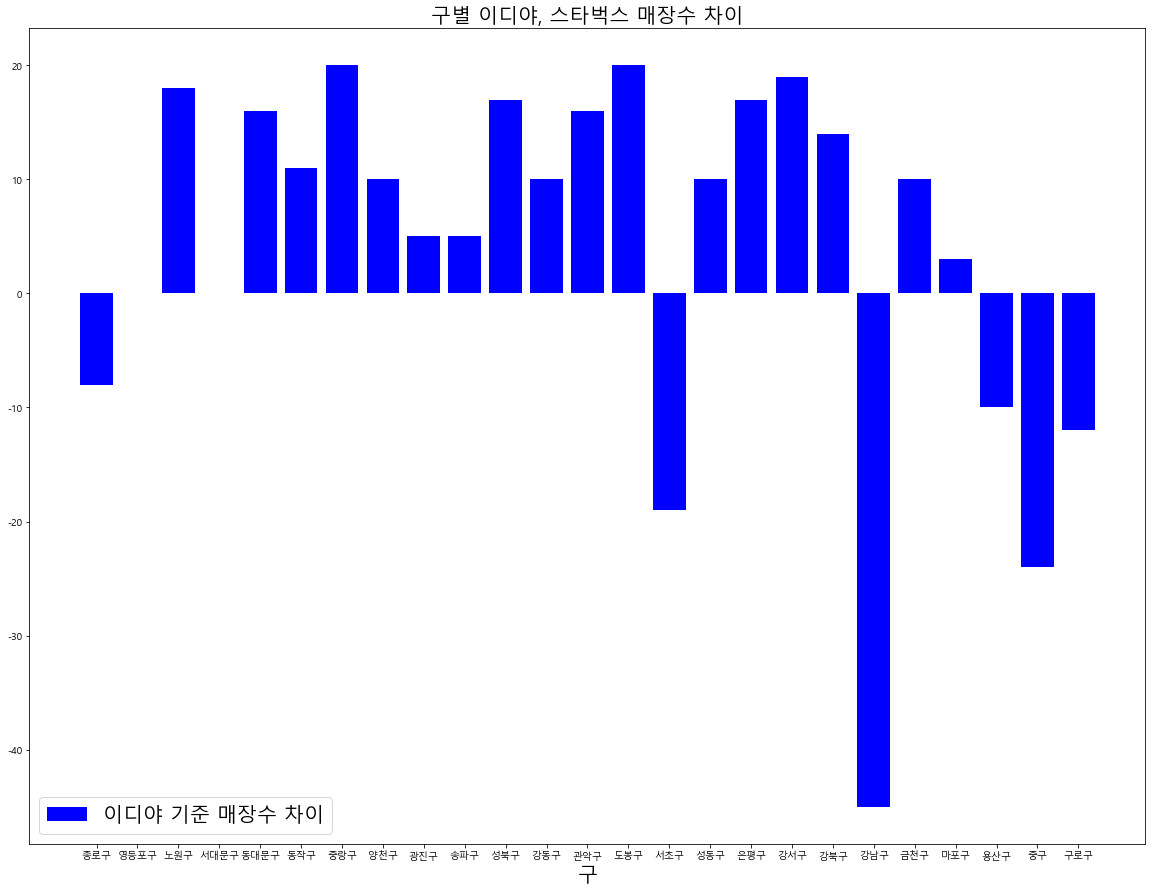

In [21]:
a = sum_data["매장 수 차이"]
y = "ediya"

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(20,15))
plt.bar(sum_data["구"], a, color = 'b', label ="이디야 기준 매장수 차이" )
plt.title("구별 이디야, 스타벅스 매장수 차이", fontsize = 20)
plt.xlabel("구", fontsize = 20)
plt.legend(loc ='lower left', fontsize = 20)
plt.show()